In [1]:
import pandas as pd
print(pd.__version__)

import numpy as np

import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

2.2.3


In [5]:
data=pd.read_csv(r"C:\Users\Khushi\OneDrive\Desktop\Data\cleaned-dataset.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,4.2,3,9500,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19,1,2015


## EDA

In [6]:
data.shape

(10840, 15)

In [8]:
data[data['App'].duplicated()]
data=data.drop_duplicates(subset=['App'],keep='first')

In [9]:
data.shape

(9659, 15)

In [10]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

print("Numerical features are:", numerical_features)
print("Categorical features are:", categorical_features)

Numerical features are: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
Categorical features are: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


### FEATURE INFORMATION

1. **APP**: Name of the application  
2. **CATEGORY**: Category under which the application falls  
3. **RATING**: Rating of application at Play Store  
4. **REVIEWS**: Number of reviews of application on Play Store  
5. **SIZE**: Size of application  
6. **INSTALLS**: Number of installs of the app  
7. **TYPE**: Free or paid app  
8. **PRICE**: Price of the app  
9. **CONTENT RATING**: Target audience category  
10. **GENRE**: Genre to which the app belongs  
11. **CURRENT VER**: Current version of the application available  
12. **ANDROID VER**: Android version of application  
13. **DAY**: Day of latest update  
14. **MONTH**: Month of latest update  
15. **YEAR**: Year of latest update  


In [11]:
## prportion of count data on categorical column
for cols in categorical_features:
    print(data[cols].value_counts(normalize=True)*100)
    print("---------------------")

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
---------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.8

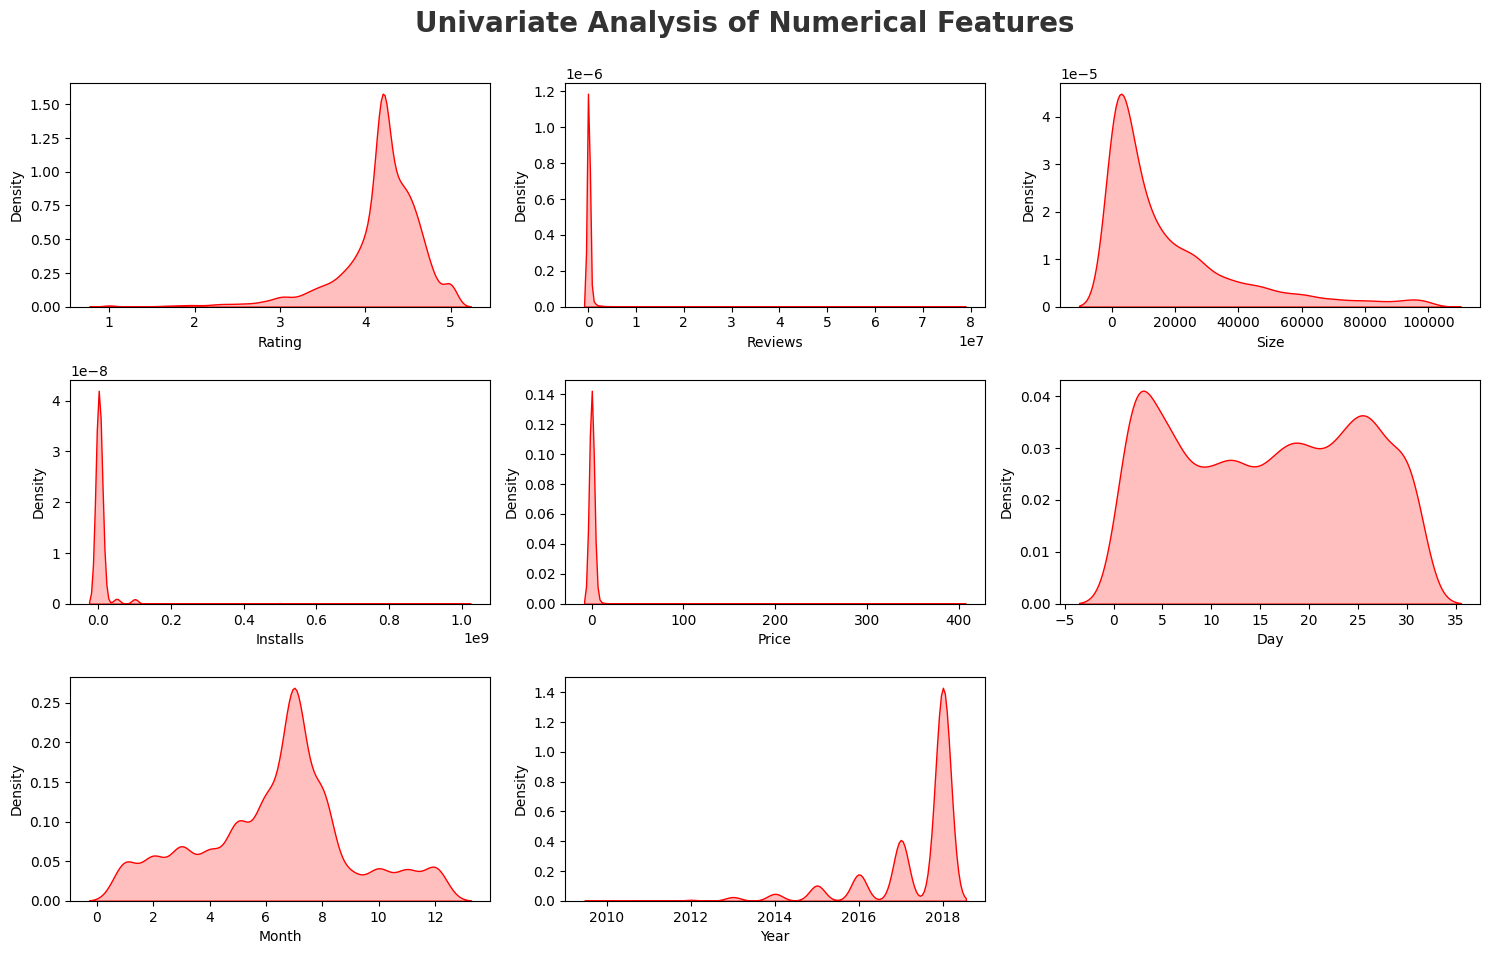

In [12]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=data[numerical_features[i]],shade=True,color='r') ##kernel density estimation
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

OBSERVATION: 'Rating' and 'Year' are left skewed while 'Reviews','Size','Installs' and 'Price' are right skewed.

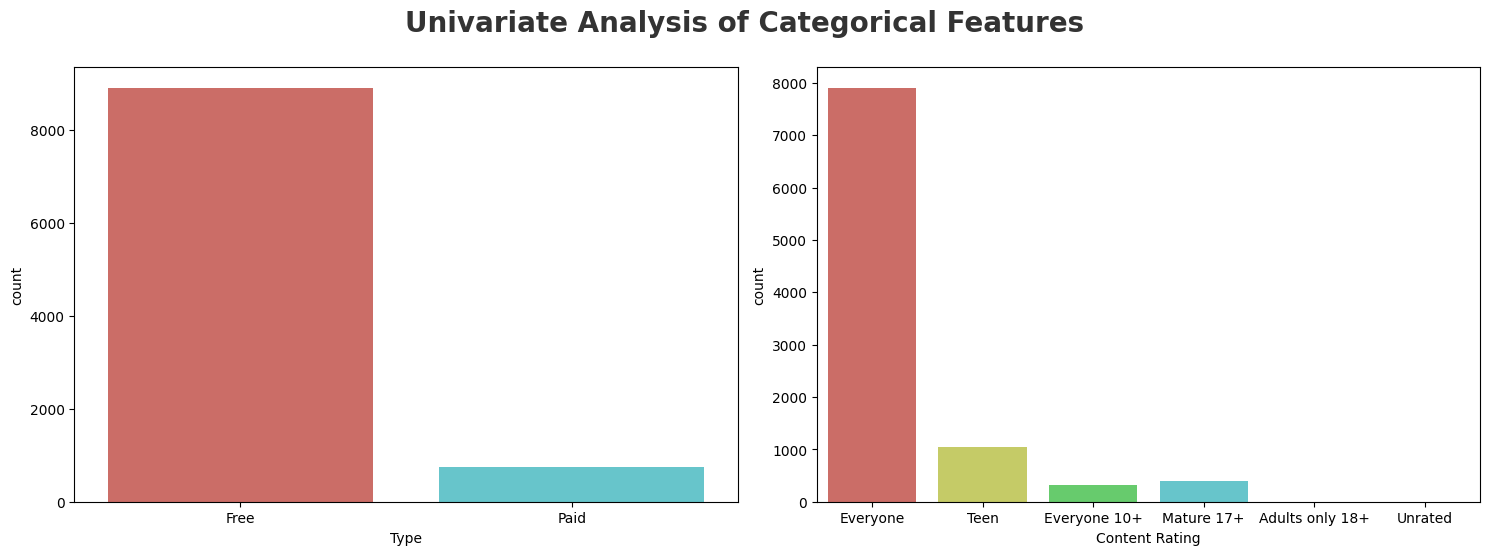

In [13]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category= ['Type','Content Rating']

for i in range(0, len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[category[i]],palette='hls')
    plt.xlabel(category[i])
    plt.xticks(rotation=0)
    plt.tight_layout()

OBSERVATION: Free apps are the dominating ones.
             Apps available for everyone(not restricted by age barrier) are used most.

In [14]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


Text(0.5, 0.9, 'Category Distribution')

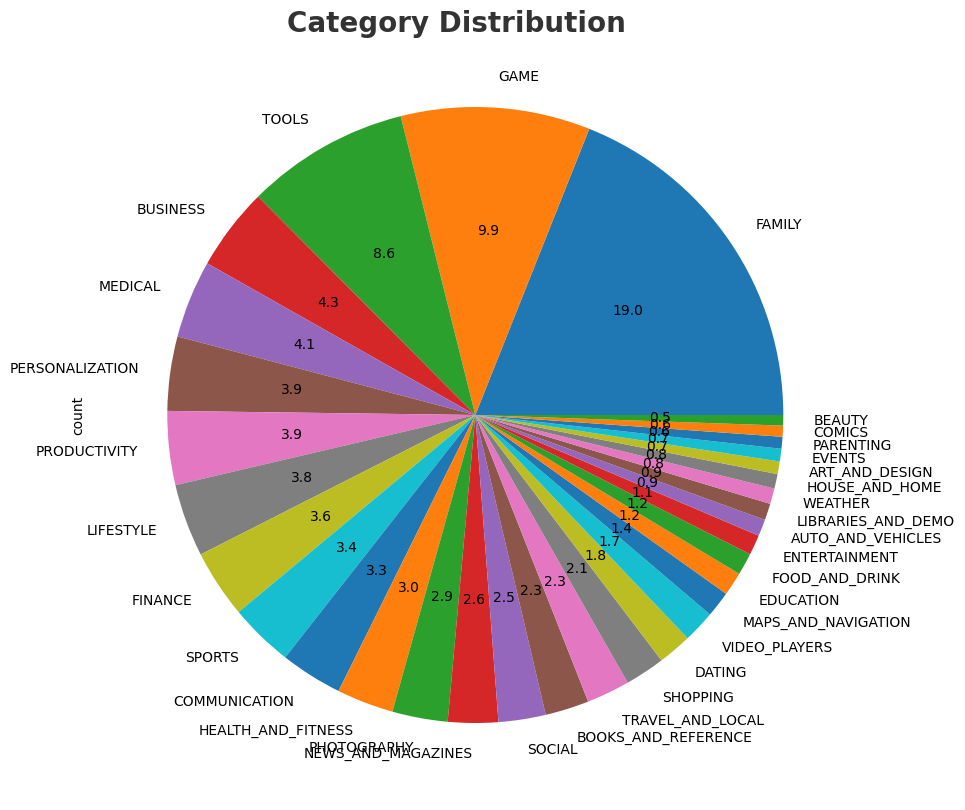

In [36]:
data['Category'].value_counts().plot.pie(y=data['Category'],figsize=(15,10),autopct='%1.1f')
plt.suptitle('Category Distribution',fontsize=20, fontweight='bold', alpha=0.8, y=0.9)

OBSERVATION
<br>
1.Categories like 'Family','Games' and 'Tools' comprise of more than 35% of apps available on playstore.
<br>
2.Least available >10 categories are hardly 2.5% of playstore.

In [16]:
category=pd.DataFrame(data['Category'].value_counts())
category.rename(columns={'Category':'Counts'},inplace=True)

In [17]:
category.head()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


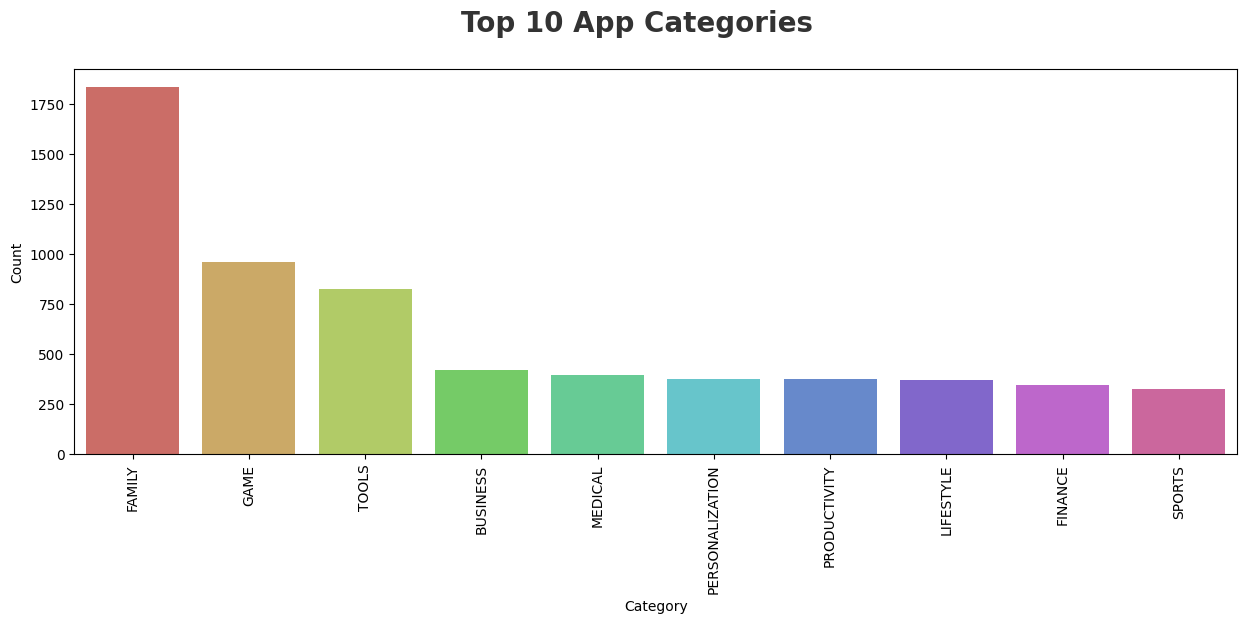

In [18]:
category = category.reset_index()  # Convert index to column
category.columns = ['Category', 'Count']  # Rename columns

plt.figure(figsize=(15,5))
plt.suptitle('Top 10 App Categories',fontsize=20, fontweight='bold', alpha=0.8, y=1.)

sns.barplot(x='Category', y='Count', data=category[:10], palette='hls')
plt.xticks(rotation=90)
plt.show()

In [19]:
data_sorted=data.sort_values(by=['Installs'],ascending=False)

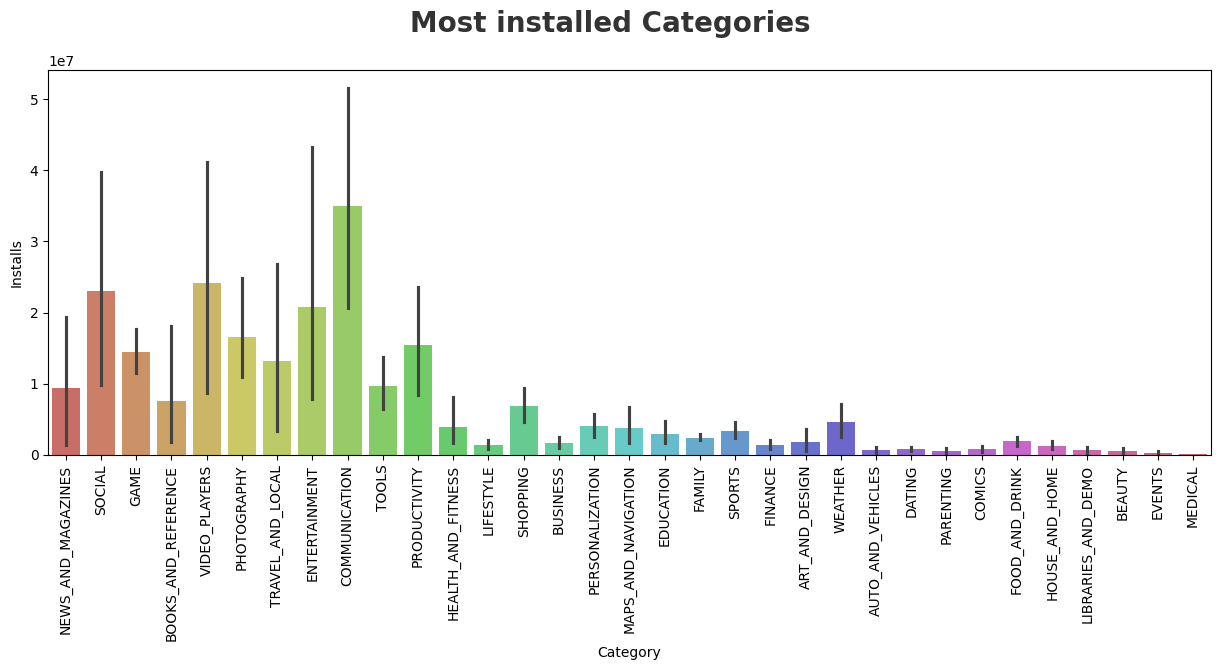

In [20]:
plt.figure(figsize=(15,5))
plt.suptitle('Most installed Categories',fontsize=20, fontweight='bold', alpha=0.8, y=1.)

sns.barplot(x='Category', y='Installs', data=data_sorted, palette='hls')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0.9, 'Distribution of Rounded Ratings with Absolute Counts')

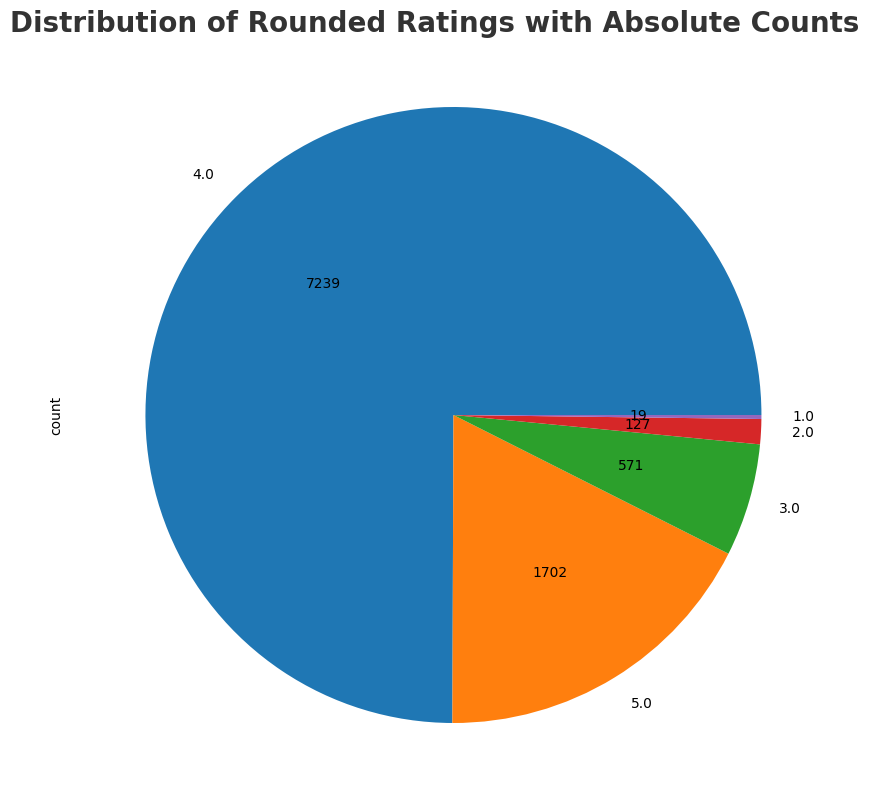

In [41]:
int_rating=data['Rating'].round()
count=int_rating.value_counts()

def absolute_value(perc,values):
    value = int(perc / 100 * sum(values))
    return f'{value}'

count.plot.pie(y=count,figsize=(15,10),autopct=lambda p: absolute_value(p,count))
plt.suptitle('Distribution of Rounded Ratings with Absolute Counts',fontsize=20, fontweight='bold', alpha=0.8, y=0.9)


In [22]:
tar_category=pd.DataFrame(data['Category'].value_counts()).head(5)
tar_category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


In [24]:
family_apps=data[data['Category']=='FAMILY']

top_family_apps=family_apps.sort_values(by=['Rating','Reviews','Size','Installs'], ascending=[False,False,True,False])
top_family_apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
6823,Barisal University App-BU Face,FAMILY,5.0,100,10000,1000,Free,0.0,Everyone,Education,3.1.1,4.0.3 and up,6,5,2018
9496,Master E.K,FAMILY,5.0,90,0,1000,Free,0.0,Everyone,Education,1.5.0,4.4 and up,11,8,2017
7842,CS & IT Interview Questions,FAMILY,5.0,43,3300,1000,Free,0.0,Everyone,Education,1.1,4.2 and up,27,3,2018
5852,Quran Khmer Offline AY,FAMILY,5.0,41,4000,1000,Free,0.0,Everyone,Education,10.6,4.2 and up,13,12,2017
5507,Accounting Quiz (AQ) Malaysia,FAMILY,5.0,25,0,1000,Free,0.0,Everyone,Education,Varies with device,4.0 and up,29,1,2018


In [25]:
game_apps=data[data['Category']=='GAME']

top_game_apps=game_apps.sort_values(by=['Rating','Reviews','Size','Installs'], ascending=[False,False,True,False])
top_game_apps.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
10720,Mad Dash Fo' Cash,GAME,5.0,14,16000,100,Free,0.00,Everyone,Arcade,2.5a,4.1 and up,19,6,2017
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,0.1,2.3 and up,11,3,2017
5795,Axe Champs! Wars,GAME,5.0,8,25000,50,Free,0.00,Everyone,Arcade,1.1,4.1 and up,26,6,2018
7466,211:CK,GAME,5.0,8,38000,10,Paid,0.99,Teen,Arcade,1.3,4.1 and up,11,4,2018
5822,Flippy Axe : Flip The Knife & Axe Simulator,GAME,5.0,7,15000,100,Free,0.00,Everyone,Arcade,1.1,4.2 and up,27,9,2017


In [26]:
tools_apps=data[data['Category']=='TOOLS']

top_tools_apps=tools_apps.sort_values(by=['Rating','Reviews','Installs','Size'], ascending=[False,False,False,True])
top_tools_apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
7506,CL REPL,TOOLS,5.0,47,17000,1000,Free,0.0,Everyone,Tools,1.0.19,4.1 and up,10,4,2018
7517,CL Notifier,TOOLS,5.0,36,3200,100,Free,0.0,Teen,Tools,1.0,4.0 and up,2,8,2017
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,3200,5000,Free,0.0,Everyone,Tools,1.1.3,4.3 and up,13,6,2018
9806,Dr. ES PV Calculator,TOOLS,5.0,19,11000,500,Free,0.0,Everyone,Tools,3.4.7.2.16,4.1 and up,11,3,2018
9008,DW Timer,TOOLS,5.0,9,1500,100,Free,0.0,Everyone,Tools,1.0,1.6 and up,5,4,2017


In [27]:
business_apps=data[data['Category']=='BUSINESS']

top_business_apps=business_apps.sort_values(by=['Rating','Reviews','Size','Installs'], ascending=[False,False,True,False])
top_business_apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
10658,FN,BUSINESS,5.0,14,3300,50,Free,0.0,Everyone,Business,1.0,4.0 and up,1,2,2018
6391,BK Arogyam Task Track,BUSINESS,5.0,8,3700,100,Free,0.0,Everyone,Business,1.1.1,4.1 and up,5,6,2018
9293,EF App,BUSINESS,5.0,8,20000,100,Free,0.0,Everyone,Business,1.0.5,4.4 and up,23,1,2017
7478,CK Employee Portal,BUSINESS,5.0,7,15000,1000,Free,0.0,Everyone,Business,1.0.1,4.1 and up,5,1,2017
9002,DW Security,BUSINESS,5.0,6,15000,100,Free,0.0,Everyone,Business,69.1,4.1 and up,25,7,2018


In [28]:
medical_apps=data[data['Category']=='MEDICAL']

top_medical_apps=medical_apps.sort_values(by=['Rating','Reviews','Installs','Size'], ascending=[False,False,False,True])
top_medical_apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
7881,CARDIAC CT TECHNIQUE,MEDICAL,5.0,6,17000,1000,Free,0.0,Everyone,Medical,2.0,4.0.3 and up,10,3,2018
2527,BP Journal - Blood Pressure Diary,MEDICAL,5.0,6,26000,1000,Free,0.0,Everyone,Medical,1.0.32,4.4 and up,25,5,2018
7872,CT Cervical Spine,MEDICAL,5.0,5,17000,1000,Free,0.0,Everyone,Medical,2.0,4.0 and up,20,1,2018
5148,Kimbrough AH,MEDICAL,5.0,5,28000,100,Free,0.0,Everyone,Medical,300000.0.90,4.0.3 and up,21,9,2017
2450,Tablet Reminder,MEDICAL,5.0,4,2500,5,Free,0.0,Everyone,Medical,1.0,4.1 and up,3,8,2018
